# Netflix Movies Analysis
This notebook explores Netflix movies released during the 1990s decade. We’ll examine the data to find the most common movie duration and count the number of short Action movies (less than 90 minutes) from that period.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## 2. Data Overview

In [2]:
# Check general info about the dataset
netflix_df.info()

# Basic statistics
netflix_df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,4812,4812,s2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,4812,2,Movie,4677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,4812,4812,7:19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,4812,3615,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,4812,4690,Samuel West,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,4812,72,United States,1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,4812,1292,"January 1, 2020",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,4812.0,NaN,NaN,NaN,2012.711554,9.517978,1942.0,2011.0,2016.0,2018.0,2021.0
duration,4812.0,NaN,NaN,NaN,99.566708,30.889305,1.0,88.0,99.0,116.0,253.0
description,4812,4807,A scheming matriarch plots to cut off her disa...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Filter for Movies Released in the 1990s

In [3]:
# Keep only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie']

# Filter for 1990–1999
movies_1990s = movies_df[(movies_df['release_year'] >= 1990) & (movies_df['release_year'] <= 1999)]

# Display first few rows
movies_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


## 4. Distribution of Movie Durations in the 1990s

C:\Users\E15\AppData\Local\Temp\ipykernel_12108\1870418414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_1990s['duration_min'] = movies_1990s['duration'].replace(' min', '').astype(float)


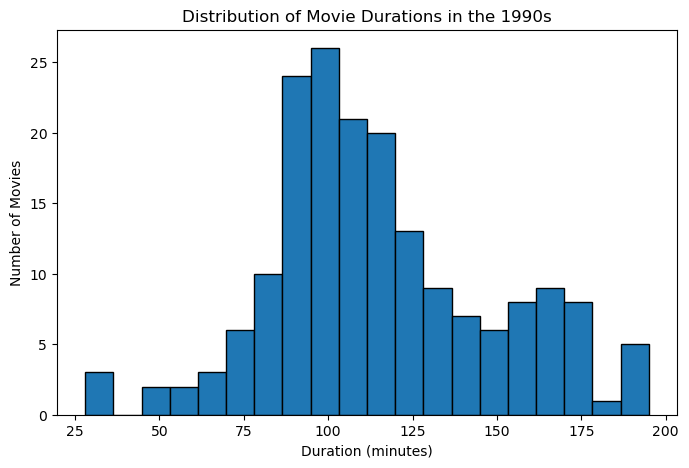

In [4]:
# Convert duration to numeric (strip 'min')
movies_1990s['duration_min'] = movies_1990s['duration'].replace(' min', '').astype(float)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(movies_1990s['duration_min'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

## 5. Most Frequent Movie Duration (Mode)

In [5]:
# Calculate the most frequent duration
mode_duration = movies_1990s['duration_min'].mode()[0]
duration = int(mode_duration)

print('Most frequent movie duration (1990s):', duration)

Most frequent movie duration (1990s): 94


## 6. Counting Short Action Movies (<90 minutes)

In [6]:
# Filter for Action movies
action_1990s = movies_1990s[movies_1990s['genre'] == 'Action']

# Count short movies (<90 minutes)
short_movie_count = sum(action_1990s['duration_min'] < 90)

print('Number of short Action movies (1990s):', short_movie_count)

Number of short Action movies (1990s): 7


## 7. Conclusions
- The most frequent duration helps identify the typical movie length in the 1990s.
- The count of short Action movies reveals how rare or common shorter films were.
- Further exploration could include genre trends, release patterns, or regional differences.